# MVA Mini Project 1

Student: Pierre-Louis Guhur - pierre-louis.guhur@ens-paris-saclay.fr

# 1. Getting started

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
#from shutil import copyfile
#copyfile(src="../input/mp1.py", dst = "../working/mp1.py")
from mp1 import *

import keras
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,Activation, MaxPooling1D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization

from tensorflow.test import is_gpu_available
print("GPU is available" if is_gpu_available() else "GPU is not available")

models = {}

Using TensorFlow backend.


GPU is available


# 2. Simple Classification

Example of the classes to classify

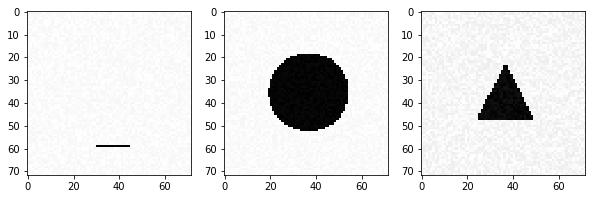

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(131)
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.subplot(132)
im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.subplot(133)
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.show()

n_classes = 3
n_hidden = 64

In [4]:
X_train, Y_train = generate_dataset_classification(300, 20, False)
X_test, Y_test = generate_test_set_classification(300, 20, False)

Creating data: 100%|██████████| 300/300 [00:03<00:00, 95.52it/s]


## 2.1 Training a model with SGD

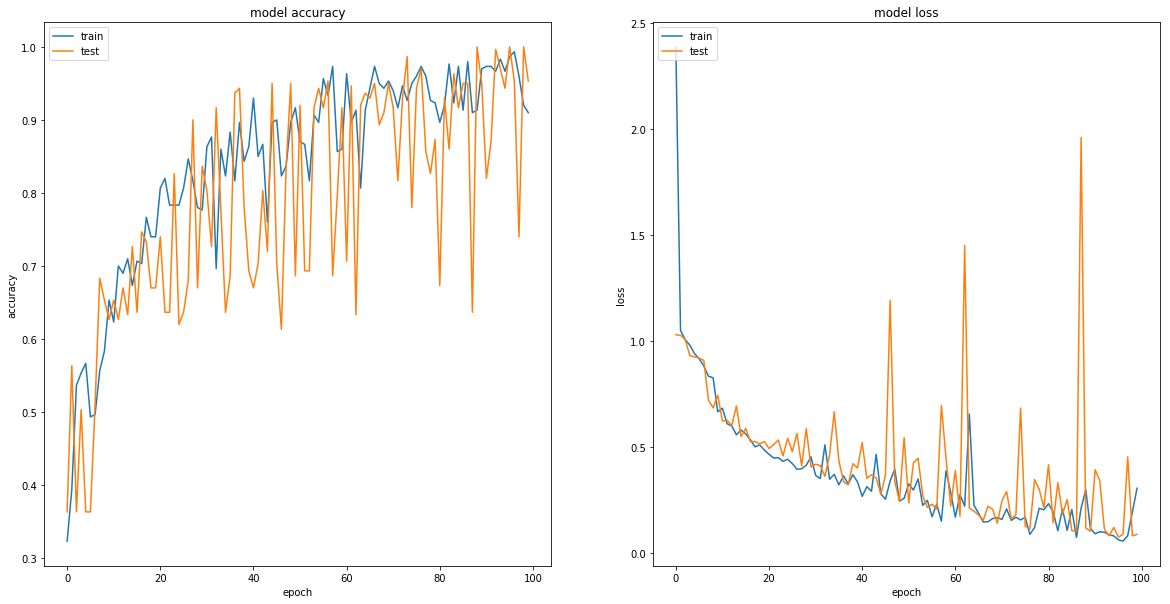

In [5]:
models['sgd'] = Sequential()
models['sgd'].add(Dense(n_hidden, activation='relu', input_shape=(X_train.shape[1],)))
models['sgd'].add(Dense(n_classes, activation='softmax'))
models['sgd'].compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = models['sgd'].fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=0)
plot_history(history)

## 2.2 Training a model with Adam

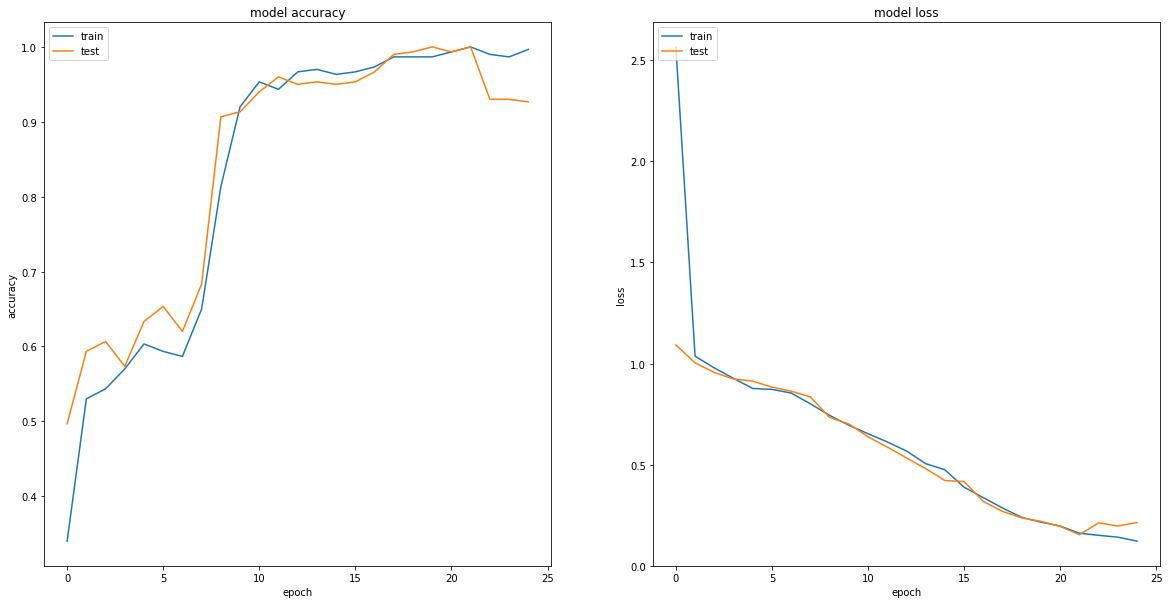

In [6]:
early_stopping_monitor = EarlyStopping(patience = 3)

models['adam'] = Sequential()
models['adam'].add(Dense(n_hidden, activation='relu', input_shape=(X_train.shape[1],)))
models['adam'].add(Dense(n_classes, activation='softmax'))
models['adam'].compile(optimizer='adam', loss='categorical_crossentropy', 
                       metrics=['accuracy'])
history = models['adam'].fit(X_train, Y_train, batch_size=32, epochs=100, 
                             validation_data=(X_test, Y_test), callbacks=[early_stopping_monitor], verbose=0)
plot_history(history)

# 3. Visualization of the Solution

In [30]:
print(models['adam'].summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                331840    
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 195       
Total params: 332,035
Trainable params: 332,035
Non-trainable params: 0
_________________________________________________________________
None


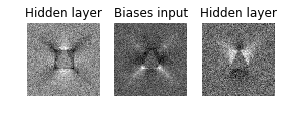

In [57]:
weights = models['adam'].get_weights()
image = weights[0] @ weights[2]
n_layers = len(weights)
titles = ["Hidden layer", "Biases input", "Hidden layer"]

for k in range(3):
    plt.subplot(1, n_layers, k + 1)
    plt.imshow(image[:, k].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title(titles[k])
    plt.axis("off")

plt.show()

# 4. A More Difficult Classification Problem

In [2]:
X_train, Y_train = generate_dataset_classification(600, 20, True)
X_test, Y_test = generate_test_set_classification(300, 20, True)

Creating data: 100%|██████████| 300/300 [00:03<00:00, 96.82it/s] 


300/300 [==============================] - 0s 53us/step
Evaluation on the test set: accuracy 96.00% - loss 0.19


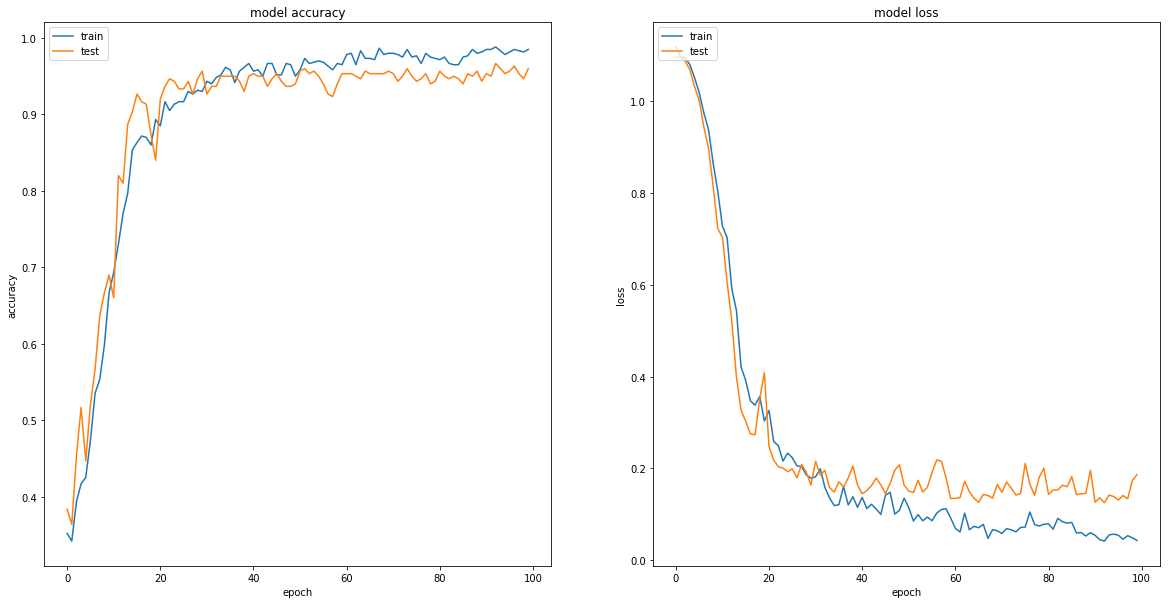

In [21]:
models['convnet'] = Sequential()
models['convnet'].add(Conv2D(32,(5,5), strides=3, activation='relu', input_shape=(72,72,1))) #filters
models['convnet'].add(MaxPooling2D(pool_size=(2,2))) #pooling layer
models['convnet'].add(Dropout(0.5))
models['convnet'].add(Conv2D(16,(5,5), activation='relu')) #filters
models['convnet'].add(MaxPooling2D(pool_size=(2,2))) #pooling layer
models['convnet'].add(Dropout(0.25))
models['convnet'].add(Flatten())
models['convnet'].add(Dense(256))
models['convnet'].add(Activation('relu'))
models['convnet'].add(Dropout(0.5))
models['convnet'].add(Dense(3))
models['convnet'].add(Activation('softmax'))
models['convnet'].compile(optimizer='adam', loss='categorical_crossentropy', 
                  metrics=['accuracy'])

X_train2 = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, -1).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, -1).astype('float32')

history = models['convnet'].fit(X_train2, Y_train, batch_size=32, epochs=100, 
                             validation_data=(X_test2, Y_test), verbose=0)

evaluation = models['convnet'].evaluate(X_test2, Y_test)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]:.2f}")

plot_history(history)



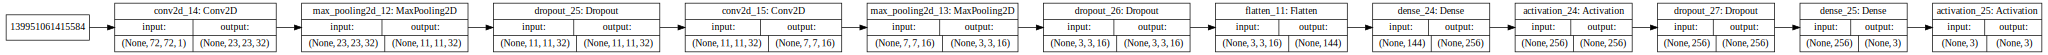

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model2, show_shapes=True, rankdir="LR").create(prog='dot', format='svg'))

# 5. A Regression Problem

In [ ]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()

def normalize_triangle(Y):
    return (Y - np.mean(Y, axis=0))/(np.std(Y) + 1e-8)

def normalize_triangle1(Y):
    p =[[Y[0], Y[1], np.sqrt(Y[0]**2 + Y[1]**2)],
    [Y[2], Y[3], np.sqrt(Y[2]**2 + Y[3]**2)],
    [Y[4], Y[5], np.sqrt(Y[4]**2 + Y[5]**2)]]
    p.sort(key=lambda x:x[2])
    y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
    return y

Y_train_n = normalize_triangle(Y_train)
#for i in range(X_train.shape[0]):
#    Y_train_n[i] = normalize_triangle(Y_train[i])
    
Y_test_n = normalize_triangle(Y_test)
#for i in range(X_test.shape[0]):
#    Y_test_n[i] = normalize_triangle(Y_test[i])
    
X_train2d = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')
X_test2d = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')

visualize_prediction(X_train[0], Y_train[0])

Creating data:  77%|███████▋  | 231/300 [00:02<00:00, 101.79it/s]

In [8]:
models['regr'] = Sequential()
models['regr'].add(Conv2D(64, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
models['regr'].add(BatchNormalization())
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Conv2D(32, (3,3), activation="relu", padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Conv2D(16, (3,3), activation="relu", padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Flatten())

#models['regr'].add(Dense(256, activation='relu'))
#models['regr'].add(MaxPooling1D(pool_size=3, padding="same"))
#models['regr'].add(Dropout(0.4))
#models['regr'].add(Dense(256, activation='relu'))
#models['regr'].add(Dropout(0.4))
models['regr'].add(Dense(128))
models['regr'].add(BatchNormalization())
models['regr'].add(Activation('relu'))

#models['regr'].add(MaxPooling2D(pool_size=(4), padding="same"))
models['regr'].add(Dropout(0.3))
models['regr'].add(Dense(6, activation='sigmoid'))


# model3 = Sequential()
# model3.add(Conv2D(16,(5,5), activation='relu', input_shape=(72,72,1))) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(32,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(64,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Flatten())
# model3.add(Dense(64))
# model3.add(Activation('relu'))
# model3.add(Dropout(0.5))
# model3.add(Dense(6))


models['regr'].compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = models['regr'].fit(X_train2d, Y_train, batch_size=32, epochs=60, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = models['regr'].evaluate(X_test2d, Y_test)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

NameError: name 'models' is not defined

In [ ]:
models['regr'] = Sequential()
models['regr'].add(Conv2D(64, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
models['regr'].add(BatchNormalization())
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Conv2D(32, (3,3), activation="relu", padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Conv2D(16, (3,3), activation="relu", padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.4))
models['regr'].add(Flatten())

#models['regr'].add(Dense(256, activation='relu'))
#models['regr'].add(MaxPooling1D(pool_size=3, padding="same"))
#models['regr'].add(Dropout(0.4))
#models['regr'].add(Dense(256, activation='relu'))
#models['regr'].add(Dropout(0.4))
models['regr'].add(Dense(128))
models['regr'].add(BatchNormalization())
models['regr'].add(Activation('relu'))

#models['regr'].add(MaxPooling2D(pool_size=(4), padding="same"))
models['regr'].add(Dropout(0.3))
models['regr'].add(Dense(6, activation='sigmoid'))


# model3 = Sequential()
# model3.add(Conv2D(16,(5,5), activation='relu', input_shape=(72,72,1))) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(32,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(64,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Flatten())
# model3.add(Dense(64))
# model3.add(Activation('relu'))
# model3.add(Dropout(0.5))
# model3.add(Dense(6))


models['regr'].compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = models['regr'].fit(X_train2d, Y_train, batch_size=32, epochs=60, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = models['regr'].evaluate(X_test2d, Y_test)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

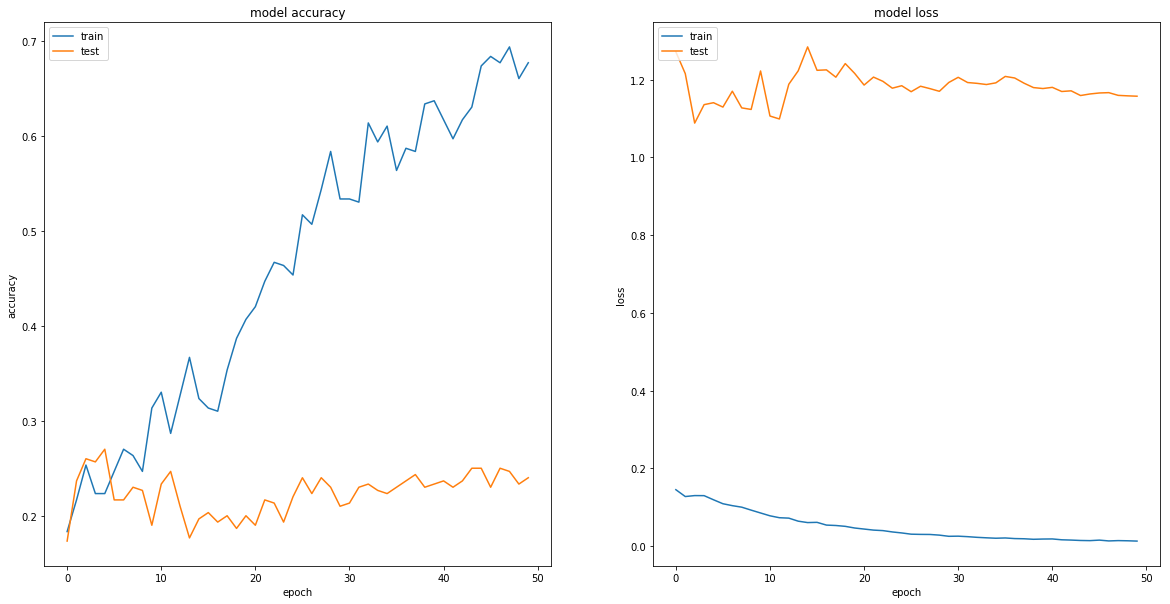

300/300 [==============================] - 0s 721us/step
Evaluation on the test set: accuracy 24.00% - loss 115.75%


In [62]:
number_filter_regression = 32
filter_size = (5,5)
pixel_window = (2,2)
model_5 = Sequential()
model_5.add(Conv2D(32, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_5.add(Dropout(0.5))
model_5.add(Conv2D(32, (5,5), activation="relu", padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_5.add(Dropout(0.25))
model_5.add(Flatten())
model_5.add(Dense(256))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.25))
#model_5.add(Dense(256, activation='relu'))
#model_5.add(Dropout(0.25))
#model_5.add(Dense(128, activation='relu'))
#model_5.add(Dropout(0.25))
model_5.add(Dense(6, activation='sigmoid'))

model_5.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model_5.fit(X_train2d, Y_train, batch_size=32, epochs=50, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = model_5.evaluate(X_test2d, Y_test_n)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

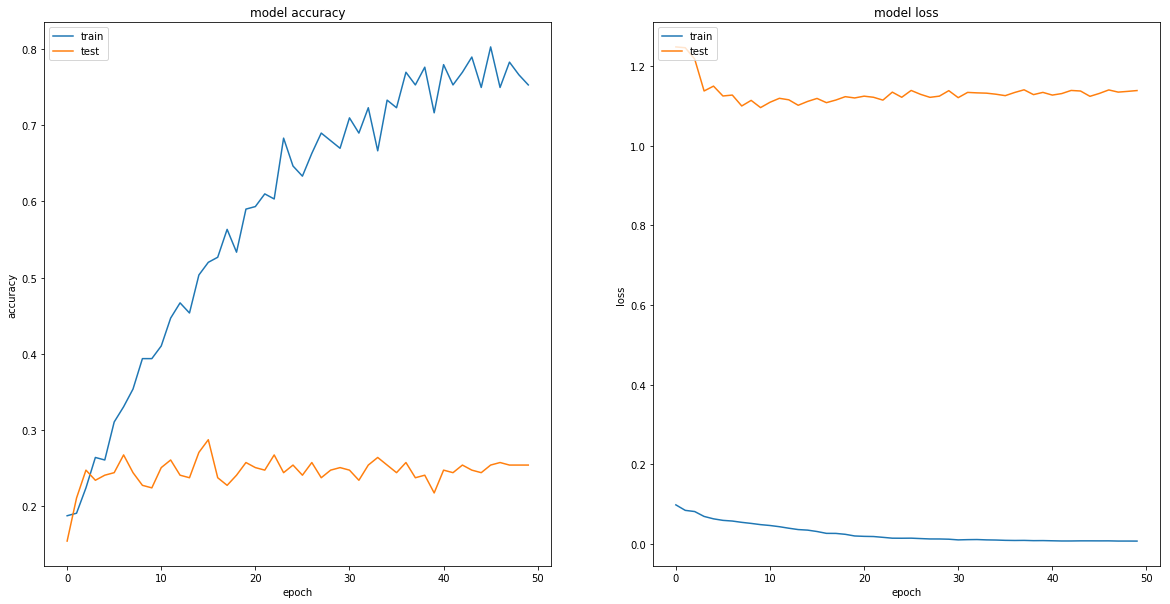

300/300 [==============================] - 0s 98us/step
Evaluation on the test set: accuracy 25.33% - loss 113.81%


In [10]:
number_filter_regression = 32
filter_size = (5,5)
pixel_window = (2,2)
model_5 = Sequential()
model_5.add(Conv2D(32, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_5.add(Dropout(0.5))
model_5.add(Conv2D(32, (5,5), activation="relu", padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_5.add(Dropout(0.25))
model_5.add(Flatten())
model_5.add(Dense(256))
model_5.add(Activation('relu'))
#model_5.add(BatchNormalization())
model_5.add(Dropout(0.25))
#model_5.add(Dense(256, activation='relu'))
#model_5.add(Dropout(0.25))
#model_5.add(Dense(128, activation='relu'))
#model_5.add(Dropout(0.25))
model_5.add(Dense(6, activation='sigmoid'))

model_5.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model_5.fit(X_train2d, Y_train, batch_size=32, epochs=50, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = model_5.evaluate(X_test2d, Y_test_n)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

In [7]:
# confirm TensorFlow sees the GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# confirm Keras sees the GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

AssertionError: 